# Random Simple Imputation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset using seaborn
df = sns.load_dataset('titanic')[['age', 'fare', 'survived']]

In [3]:
# display the first few rows of the dataframe
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [5]:
# check for missing values percentage in each column
df.isnull().mean()*100

age         19.86532
fare         0.00000
survived     0.00000
dtype: float64

In [6]:
# split the data into features and target variable
X = df.drop(columns=['survived'])
y = df['survived']

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Create new columns 
X_train['age_imputed'] = X_train['age']
X_test['age_imputed'] = X_test['age']

In [9]:
# Random Imputation
X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
X_test['age_imputed'][X_test['age_imputed'].isnull()] = X_test['age'].dropna().sample(X_test['age'].isnull().sum()).values


C:\Users\FAHAD\AppData\Local\Temp\ipykernel_20108\894514717.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['age'].dropna().sample(X_train['age'].isnull().sum()).values
C:

In [63]:
X_train

,age,fare,age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,37.0
493,71.0,49.5042,71.0
527,NaN,221.7792,35.0


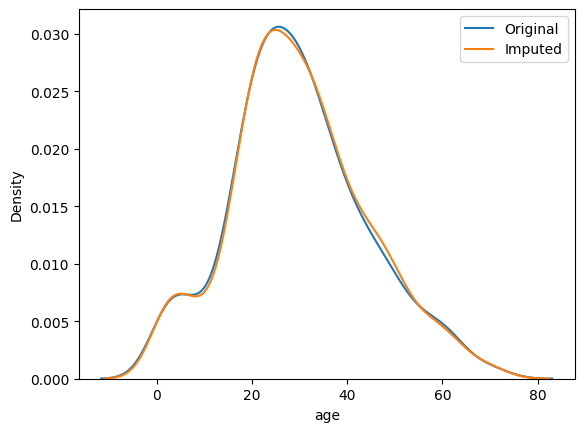

In [10]:
# visualize the distribution of original and imputed age
sns.kdeplot(X_train['age'], label='Original')
sns.kdeplot(X_train['age_imputed'], label='Imputed')
plt.legend()
plt.show()

In [65]:
print('Orignal variable variance:', X_train['age'].var())
print('Variance after random imputation:', X_train['age_imputed'].var() )

Orignal variable variance: 204.34951339046142
Variance after random imputation: 208.1619839464909


In [11]:
# compute covariance matrix
X_train[['fare', 'age', 'age_imputed']].cov()

,fare,age,age_imputed
fare,2368.246832,71.512440,45.480544
age,71.512440,204.349513,204.349513
age_imputed,45.480544,204.349513,203.802901


<Axes: >

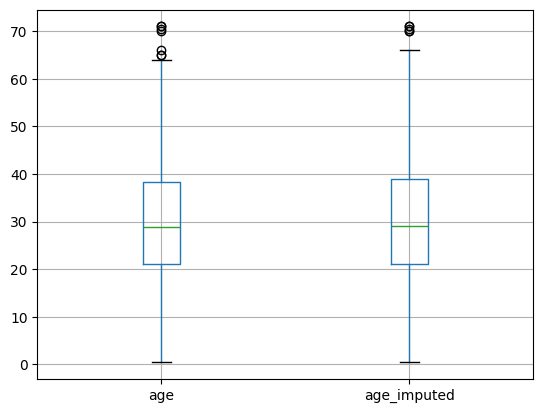

In [12]:
# boxplot to compare original and imputed age
X_train[['age', 'age_imputed']].boxplot()

In [13]:
# Example of random imputation for a single observation
observation = X_train.iloc[0]  
sampled_value = X_train['age'].dropna().sample(1, random_state=int(observation['fare']))

# Categorical Data


In [16]:
# load a different dataset
df1 = pd.read_csv('../Dataset/house-train.csv', usecols=['GarageQual', 'FireplaceQu','SalePrice'])

In [70]:
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
# check for missing values percentage in each column
df1.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [18]:
# split the data into features and target variable
X = df1
y = df1['SalePrice']

In [19]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
# Create new columns
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [75]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
253,NaN,TA,158000,TA,NaN
520,NaN,NaN,106250,NaN,NaN
499,NaN,TA,120000,TA,NaN
172,TA,Gd,239000,Gd,TA
1063,Gd,TA,110500,TA,Gd


In [21]:
# Random Imputation
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values


C:\Users\FAHAD\AppData\Local\Temp\ipykernel_20108\2853477380.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQua

In [22]:
# compare the value counts of original and imputed categorical variable
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
    axis=1)
temp.columns= ['orignal', 'imputed']

In [79]:
temp.head()

,orignal,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [23]:
# Random Imputation for FireplaceQu
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
    ],
    axis=1)
temp.columns= ['orignal', 'imputed']
temp

,orignal,imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842


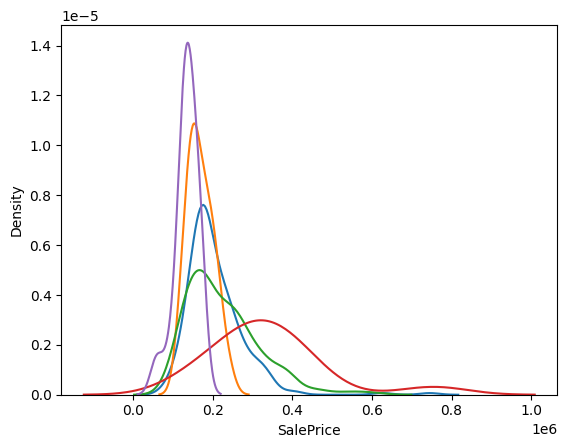

In [24]:
# visualize the distribution of SalePrice for different categories of FireplaceQu
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], label= category)
plt.show()    

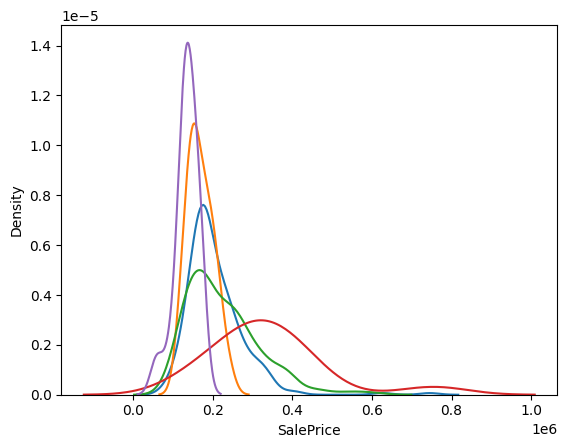

In [25]:
# visualize the distribution of SalePrice for different categories of FireplaceQu
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], label= category)
plt.show()    